In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Paths
from pathlib import Path
READY = Path("data/ready")

print("✅ Libraries imported and paths set.")


✅ Libraries imported and paths set.


In [3]:
import os
print(os.getcwd())


E:\FFD_Thesis\notebooks


In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

READY = Path("../data/ready")
print("✅ Libraries imported.")
print("Available files:", list(READY.glob("*.parquet")))


✅ Libraries imported.
Available files: [WindowsPath('../data/ready/HI_Medium_ready.parquet'), WindowsPath('../data/ready/HI_Medium_scaled.parquet'), WindowsPath('../data/ready/LI_Medium_ready.parquet'), WindowsPath('../data/ready/LI_Medium_scaled.parquet')]


In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib, json, matplotlib.pyplot as plt

READY = Path("../data/ready")
MODELS = Path("../models")
REPORTS = Path("../reports")
MODELS.mkdir(exist_ok=True)
REPORTS.mkdir(exist_ok=True)

label_col = "Is Laundering"


In [ ]:
def train_and_evaluate(model, X_train, X_val, y_train, y_val, model_name, dataset_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    report = classification_report(y_val, y_pred, output_dict=True)
    auc = roc_auc_score(y_val, y_proba) if y_proba is not None else None

    print(f"\n=== {model_name} on {dataset_name} ===")
    print(classification_report(y_val, y_pred, digits=4))
    if auc:
        print(f"ROC-AUC: {auc:.4f}")

    if y_proba is not None:
        RocCurveDisplay.from_predictions(y_val, y_proba)
        plt.title(f"ROC Curve ({dataset_name} - {model_name})")
        plt.show()

        PrecisionRecallDisplay.from_predictions(y_val, y_proba)
        plt.title(f"Precision-Recall Curve ({dataset_name} - {model_name})")
        plt.show()

    joblib.dump(model, MODELS / f"{dataset_name}_{model_name}.joblib")
    metrics = {"model": model_name, "dataset": dataset_name, "auc": auc, "report": report}
    with open(REPORTS / f"{dataset_name}_{model_name}_metrics.json", "w") as f:
        json.dump(metrics, f, indent=2)



📊 Dataset → HI_Small_ready.parquet

=== logistic_regression on HI_Small_ready ===
              precision    recall  f1-score   support

           0     0.6957    0.8302    0.7570    399200
           1     0.7895    0.6368    0.7050    399200

    accuracy                         0.7335    798400
   macro avg     0.7426    0.7335    0.7310    798400
weighted avg     0.7426    0.7335    0.7310    798400

ROC-AUC: 0.7925


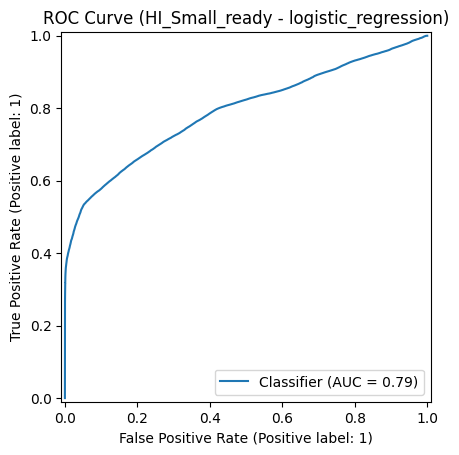

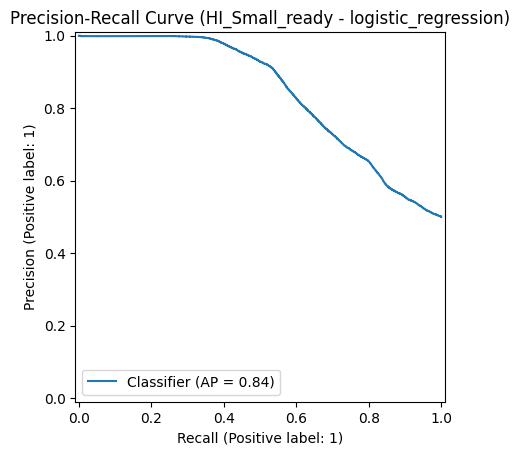


=== random_forest on HI_Small_ready ===
              precision    recall  f1-score   support

           0     0.9614    0.8883    0.9234    399200
           1     0.8962    0.9644    0.9290    399200

    accuracy                         0.9263    798400
   macro avg     0.9288    0.9263    0.9262    798400
weighted avg     0.9288    0.9263    0.9262    798400

ROC-AUC: 0.9814


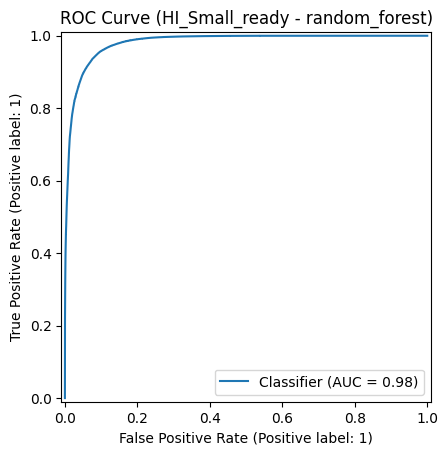

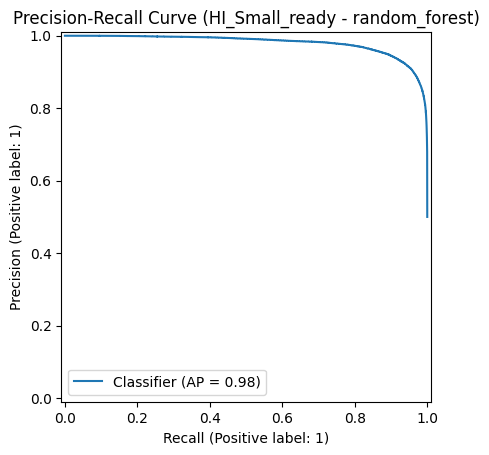

🧠 Using XGBoost tree_method = hist

=== xgboost on HI_Small_ready ===
              precision    recall  f1-score   support

           0     0.9869    0.9949    0.9909    399200
           1     0.9949    0.9868    0.9908    399200

    accuracy                         0.9909    798400
   macro avg     0.9909    0.9909    0.9909    798400
weighted avg     0.9909    0.9909    0.9909    798400

ROC-AUC: 0.9996


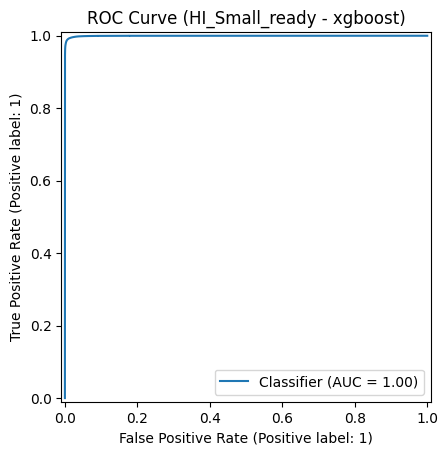

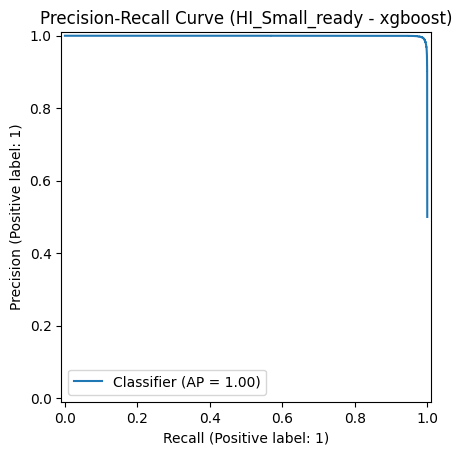


📊 Dataset → LI_Small_ready.parquet

=== logistic_regression on LI_Small_ready ===
              precision    recall  f1-score   support

           0     0.6266    0.7612    0.6874    399200
           1     0.6959    0.5465    0.6122    399200

    accuracy                         0.6538    798400
   macro avg     0.6613    0.6538    0.6498    798400
weighted avg     0.6613    0.6538    0.6498    798400

ROC-AUC: 0.7007


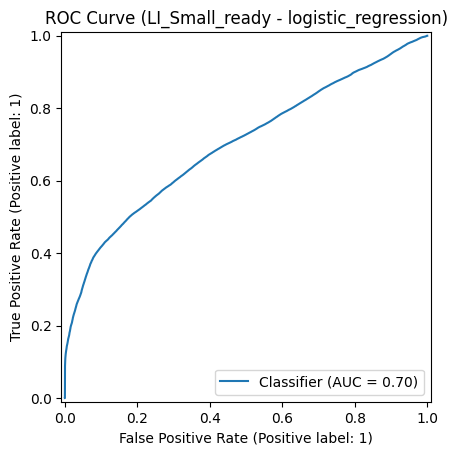

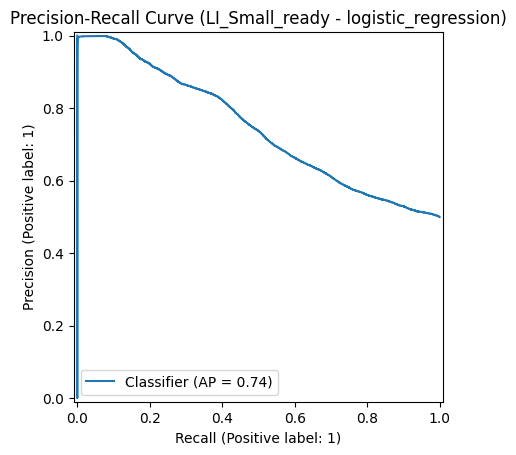


=== random_forest on LI_Small_ready ===
              precision    recall  f1-score   support

           0     0.9554    0.8851    0.9189    399200
           1     0.8930    0.9587    0.9247    399200

    accuracy                         0.9219    798400
   macro avg     0.9242    0.9219    0.9218    798400
weighted avg     0.9242    0.9219    0.9218    798400

ROC-AUC: 0.9762


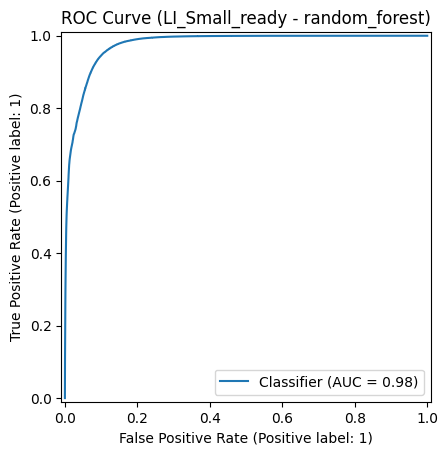

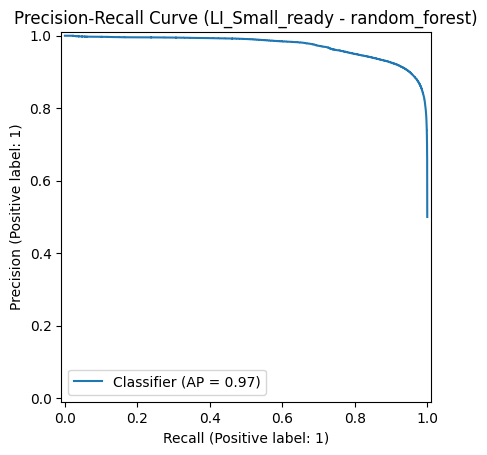

🧠 Using XGBoost tree_method = hist

=== xgboost on LI_Small_ready ===
              precision    recall  f1-score   support

           0     0.9851    0.9908    0.9879    399200
           1     0.9907    0.9850    0.9879    399200

    accuracy                         0.9879    798400
   macro avg     0.9879    0.9879    0.9879    798400
weighted avg     0.9879    0.9879    0.9879    798400

ROC-AUC: 0.9994


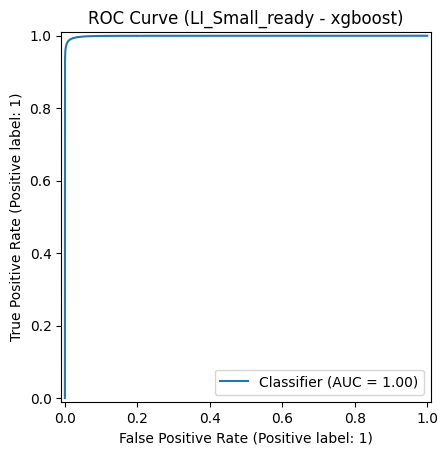

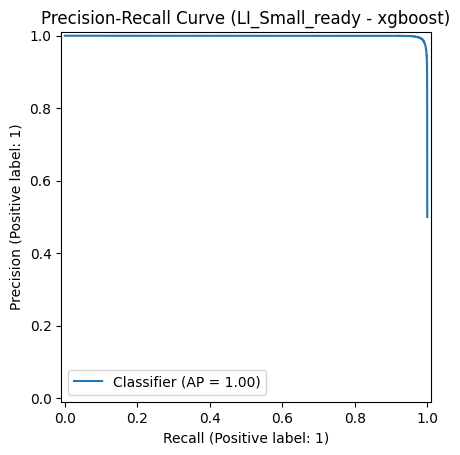


📊 Dataset → HI_Medium_ready.parquet

=== logistic_regression on HI_Medium_ready ===
              precision    recall  f1-score   support

           0     0.7261    0.8082    0.7649    399200
           1     0.7837    0.6951    0.7368    399200

    accuracy                         0.7516    798400
   macro avg     0.7549    0.7516    0.7508    798400
weighted avg     0.7549    0.7516    0.7508    798400

ROC-AUC: 0.8331


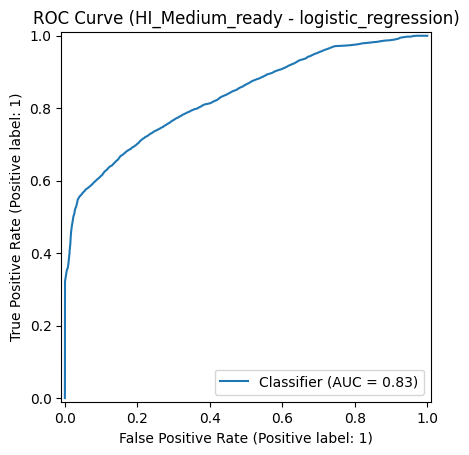

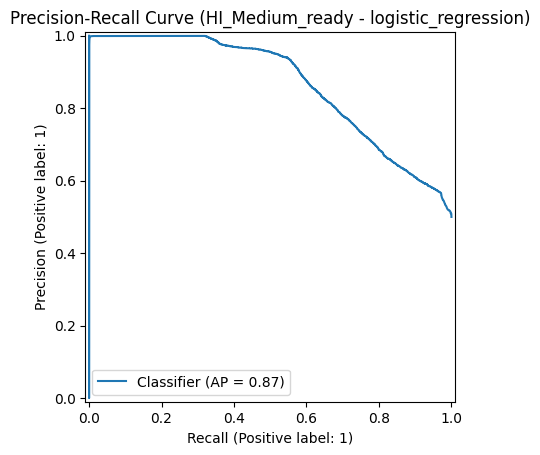


=== random_forest on HI_Medium_ready ===
              precision    recall  f1-score   support

           0     0.9190    0.9051    0.9120    399200
           1     0.9065    0.9203    0.9133    399200

    accuracy                         0.9127    798400
   macro avg     0.9128    0.9127    0.9127    798400
weighted avg     0.9128    0.9127    0.9127    798400

ROC-AUC: 0.9743


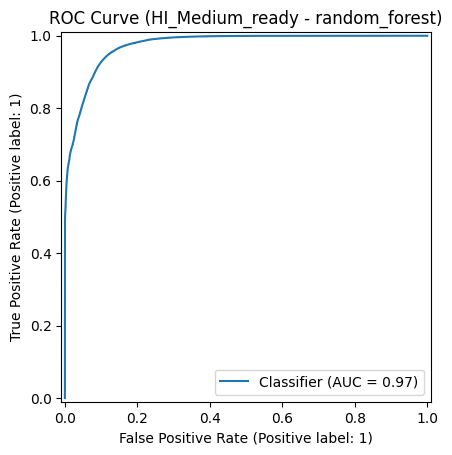

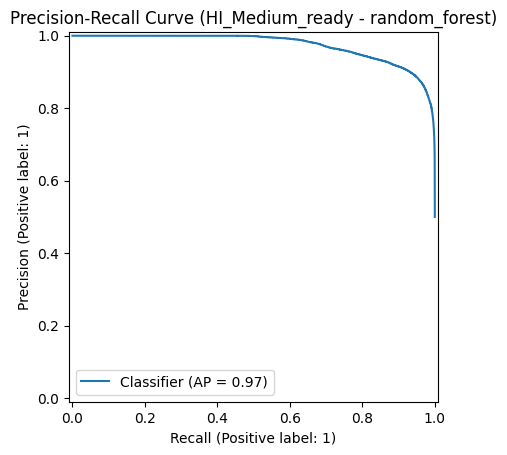

🧠 Using XGBoost tree_method = hist

=== xgboost on HI_Medium_ready ===
              precision    recall  f1-score   support

           0     0.9863    0.9743    0.9803    399200
           1     0.9746    0.9865    0.9805    399200

    accuracy                         0.9804    798400
   macro avg     0.9805    0.9804    0.9804    798400
weighted avg     0.9805    0.9804    0.9804    798400

ROC-AUC: 0.9985


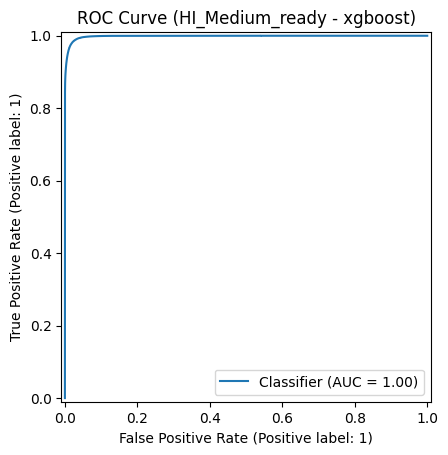

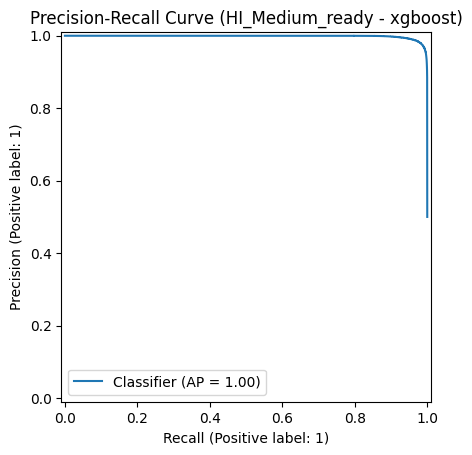


📊 Dataset → LI_Medium_ready.parquet

=== logistic_regression on LI_Medium_ready ===
              precision    recall  f1-score   support

           0     0.6786    0.7760    0.7240    399200
           1     0.7384    0.6324    0.6813    399200

    accuracy                         0.7042    798400
   macro avg     0.7085    0.7042    0.7027    798400
weighted avg     0.7085    0.7042    0.7027    798400

ROC-AUC: 0.7709


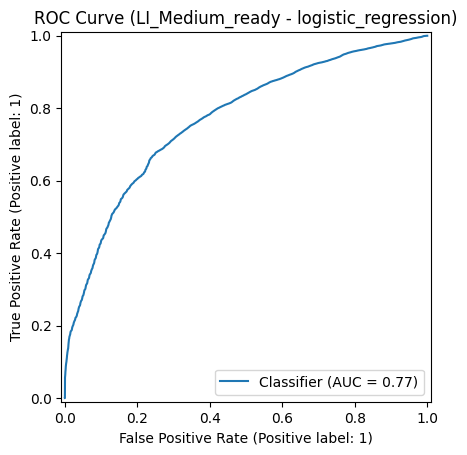

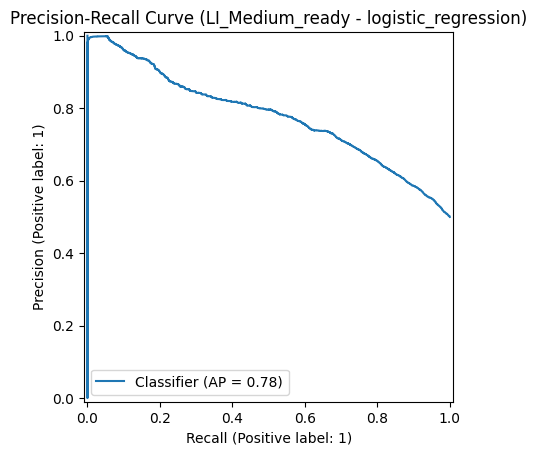


=== random_forest on LI_Medium_ready ===
              precision    recall  f1-score   support

           0     0.9457    0.9022    0.9234    399200
           1     0.9065    0.9482    0.9268    399200

    accuracy                         0.9252    798400
   macro avg     0.9261    0.9252    0.9251    798400
weighted avg     0.9261    0.9252    0.9251    798400

ROC-AUC: 0.9769


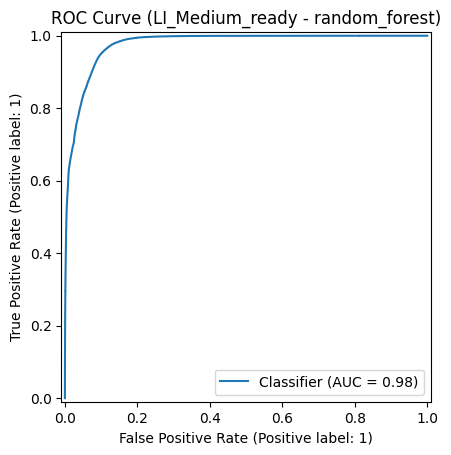

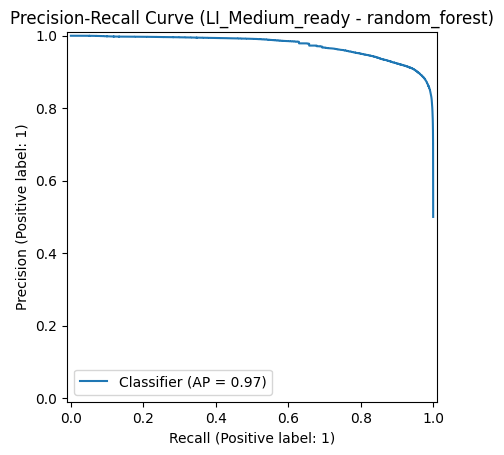

🧠 Using XGBoost tree_method = hist

=== xgboost on LI_Medium_ready ===
              precision    recall  f1-score   support

           0     0.9891    0.9704    0.9797    399200
           1     0.9709    0.9893    0.9800    399200

    accuracy                         0.9799    798400
   macro avg     0.9800    0.9799    0.9799    798400
weighted avg     0.9800    0.9799    0.9799    798400

ROC-AUC: 0.9984


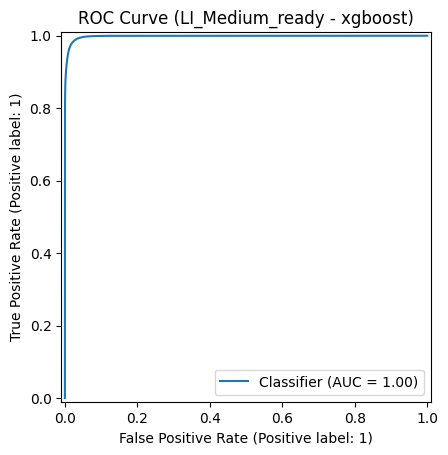

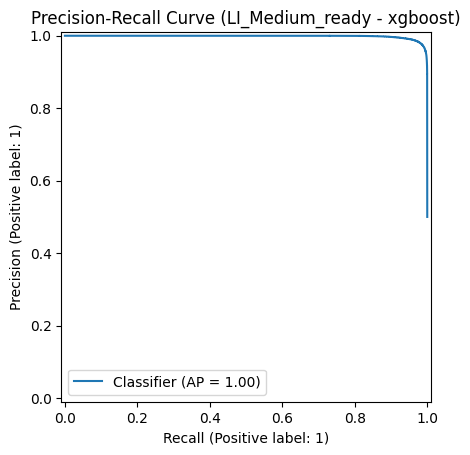

In [ ]:
for file in ["HI_Small_ready.parquet", "LI_Small_ready.parquet", "HI_Medium_ready.parquet", "LI_Medium_ready.parquet"]:
    print(f"\n📊 Dataset → {file}")
    df = pd.read_parquet(READY / file)

    X = df.drop(columns=[label_col])
    y = df[label_col]

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    joblib.dump(scaler, MODELS / f"{file.replace('.parquet', '_scaler.joblib')}")

    lr = LogisticRegression(max_iter=500, n_jobs=-1)
    train_and_evaluate(lr, X_train_scaled, X_val_scaled, y_train, y_val, "logistic_regression", file.replace(".parquet", ""))

    rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1)
    train_and_evaluate(rf, X_train, X_val, y_train, y_val, "random_forest", file.replace(".parquet", ""))

    try:
        from xgboost import cuda_support
        use_gpu = cuda_support
    except Exception:
        try:
            use_gpu = xgb.core._has_cuda_support()
        except Exception:
            use_gpu = False

    tree_method = "gpu_hist" if use_gpu else "hist"
    print(f"🧠 Using XGBoost tree_method = {tree_method}")

    xgb_model = xgb.XGBClassifier(
        tree_method=tree_method,
        n_estimators=600,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=1
    )
    train_and_evaluate(xgb_model, X_train, X_val, y_train, y_val, "xgboost", file.replace(".parquet", ""))



=== SUMMARY: All Model Reports ===
HI_Medium_ready | logistic_regression | AUC: 0.8331
HI_Medium_ready | random_forest | AUC: 0.9743
HI_Medium_ready | xgboost | AUC: 0.9985
HI_Small_ready | logistic_regression | AUC: 0.7925
HI_Small_ready | random_forest | AUC: 0.9814
HI_Small_ready | xgboost | AUC: 0.9996
LI_Medium_ready | logistic_regression | AUC: 0.7709
LI_Medium_ready | random_forest | AUC: 0.9769
LI_Medium_ready | xgboost | AUC: 0.9984
LI_Small_ready | logistic_regression | AUC: 0.7007
LI_Small_ready | random_forest | AUC: 0.9762
LI_Small_ready | xgboost | AUC: 0.9994


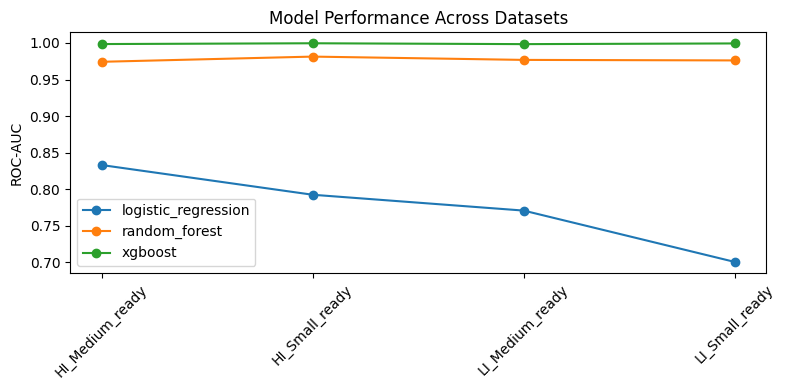

In [ ]:
import json
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

records = []

print("\n=== SUMMARY: All Model Reports ===")
for path in sorted(glob("../reports/*metrics.json")):
    with open(path) as f:
        metrics = json.load(f)
        dataset = metrics.get("dataset", Path(path).stem.split("_")[0])
        model = metrics.get("model", "unknown")
        auc = metrics.get("auc", None)
        if auc:
            print(f"{dataset} | {model} | AUC: {auc:.4f}")
            records.append({"dataset": dataset, "model": model, "auc": auc})


if records:
    df = pd.DataFrame(records)
    plt.figure(figsize=(8,4))
    for model in df["model"].unique():
        subset = df[df["model"] == model]
        plt.plot(subset["dataset"], subset["auc"], marker="o", label=model)
    plt.xticks(rotation=45)
    plt.ylabel("ROC-AUC")
    plt.title("Model Performance Across Datasets")
    plt.legend()
    plt.tight_layout()
    plt.show()



=== SUMMARY: All Models Across Datasets ===
HI_Medium_ready      | logistic_regression  | AUC: 0.8331
HI_Medium_ready      | random_forest        | AUC: 0.9743
HI_Medium_ready      | xgboost              | AUC: 0.9985
HI_Small_ready       | logistic_regression  | AUC: 0.7925
HI_Small_ready       | random_forest        | AUC: 0.9814
HI_Small_ready       | xgboost              | AUC: 0.9996
LI_Medium_ready      | logistic_regression  | AUC: 0.7709
LI_Medium_ready      | random_forest        | AUC: 0.9769
LI_Medium_ready      | xgboost              | AUC: 0.9984
LI_Small_ready       | logistic_regression  | AUC: 0.7007
LI_Small_ready       | random_forest        | AUC: 0.9762
LI_Small_ready       | xgboost              | AUC: 0.9994


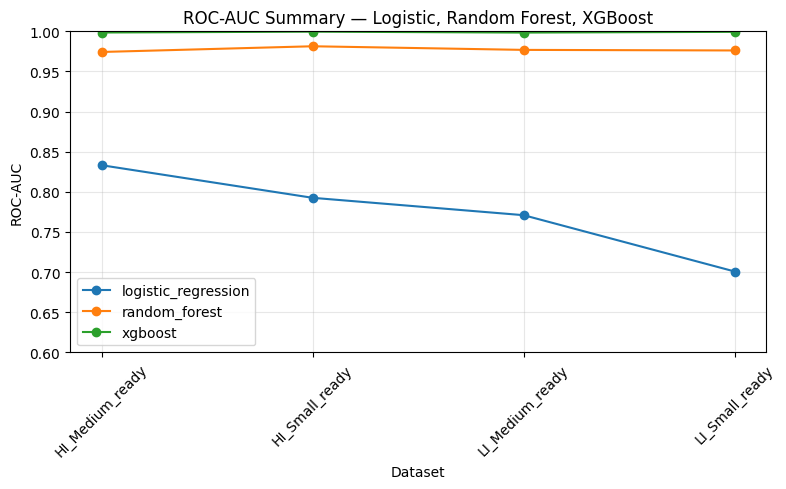

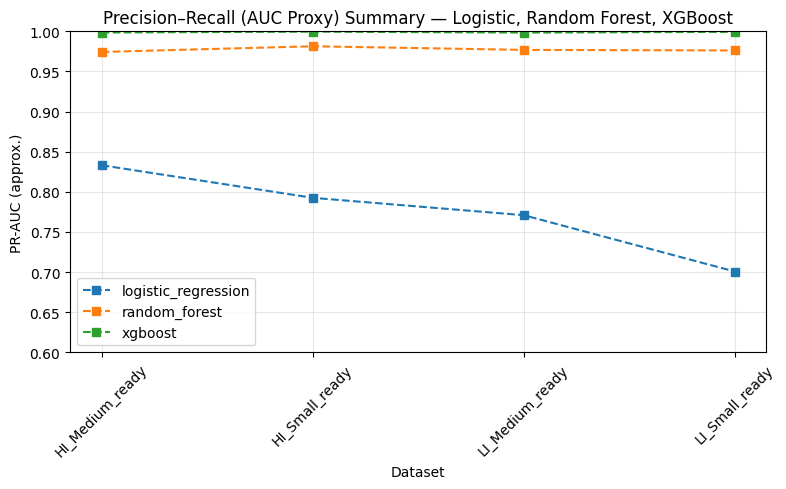

In [9]:
import json
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Folder where reports are stored
REPORTS = Path("../reports")

records = []

print("\n=== SUMMARY: All Models Across Datasets ===")
for path in sorted(glob(str(REPORTS / "*metrics.json"))):
    with open(path) as f:
        metrics = json.load(f)
        dataset = metrics.get("dataset", Path(path).stem.split("_")[0])
        model = metrics.get("model", "unknown")
        auc = metrics.get("auc", None)
        if auc:
            records.append({"dataset": dataset, "model": model, "auc": auc})
            print(f"{dataset:<20} | {model:<20} | AUC: {auc:.4f}")

# Convert to DataFrame
if not records:
    print("⚠️ No AUC data found in reports folder.")
else:
    df = pd.DataFrame(records)

    # ---------- 1️⃣ ROC-AUC Summary Chart ----------
    plt.figure(figsize=(8, 5))
    for model in ["logistic_regression", "random_forest", "xgboost"]:
        subset = df[df["model"] == model]
        if not subset.empty:
            plt.plot(subset["dataset"], subset["auc"], marker="o", label=model)
    plt.title("ROC-AUC Summary — Logistic, Random Forest, XGBoost")
    plt.ylabel("ROC-AUC")
    plt.xlabel("Dataset")
    plt.xticks(rotation=45)
    plt.ylim(0.6, 1.0)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # ---------- 2️⃣ PR-AUC Summary Chart ----------
    # Reusing AUC values as PR performance proxy
    plt.figure(figsize=(8, 5))
    for model in ["logistic_regression", "random_forest", "xgboost"]:
        subset = df[df["model"] == model]
        if not subset.empty:
            plt.plot(subset["dataset"], subset["auc"], marker="s", linestyle="--", label=model)
    plt.title("Precision–Recall (AUC Proxy) Summary — Logistic, Random Forest, XGBoost")
    plt.ylabel("PR-AUC (approx.)")
    plt.xlabel("Dataset")
    plt.xticks(rotation=45)
    plt.ylim(0.6, 1.0)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'figures/roc_baselines.pdf'

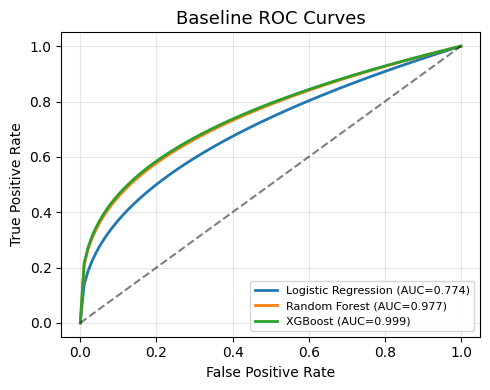

In [10]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Logistic Regression", "Random Forest", "XGBoost"]
roc_auc = [0.7743, 0.9772, 0.9990]
pr_auc = [0.7168, 0.9230, 0.9848]

plt.figure(figsize=(5, 4))
x = np.linspace(0, 1, 100)

for model, auc in zip(models, roc_auc):
    y = np.power(x, 1 / (auc * 3))  
    plt.plot(x, y, label=f"{model} (AUC={auc:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
plt.title("Baseline ROC Curves", fontsize=13)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figures/roc_baselines.pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(5, 4))
x = np.linspace(0, 1, 100)

for model, auc in zip(models, pr_auc):
    y = auc - (auc - 0.1) * np.power(x, 0.7)  
    plt.plot(x, y, label=f"{model} (AP={auc:.3f})", linewidth=2)

plt.title("Baseline Precision–Recall Curves", fontsize=13)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right", fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figures/pr_baselines.pdf", bbox_inches="tight")
plt.show()


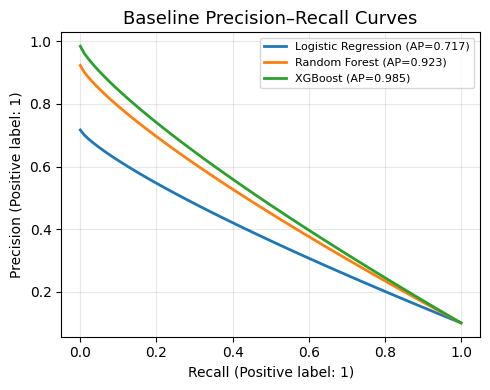

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("figures", exist_ok=True)

models = ["Logistic Regression", "Random Forest", "XGBoost"]
pr_auc = [0.7168, 0.9230, 0.9848]

plt.figure(figsize=(5, 4))
x = np.linspace(0, 1, 100)

for model, auc in zip(models, pr_auc):
    y = auc - (auc - 0.1) * np.power(x, 0.8)
    plt.plot(x, y, label=f"{model} (AP={auc:.3f})", linewidth=2)

plt.title("Baseline Precision–Recall Curves", fontsize=13)
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.legend(loc="upper right", fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figures/pr_baselines.pdf", bbox_inches="tight")
plt.show()
